In [1]:
# Importamos el CSV
import pandas as pd

df = pd.read_csv('Leads.csv')

In [2]:
# Visualizamos las primeras filas
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Vemos sus dimensiones
df.shape

(9240, 37)

In [4]:
# Vemos sus tipos de datos
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
# Vamos a ver el ratio de la gente que se convierte en cliente
df['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

# Preprocesamiento de datos

In [6]:
# Vemos sus tipos de datos
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

/tmp/ipykernel_32790/2516302290.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


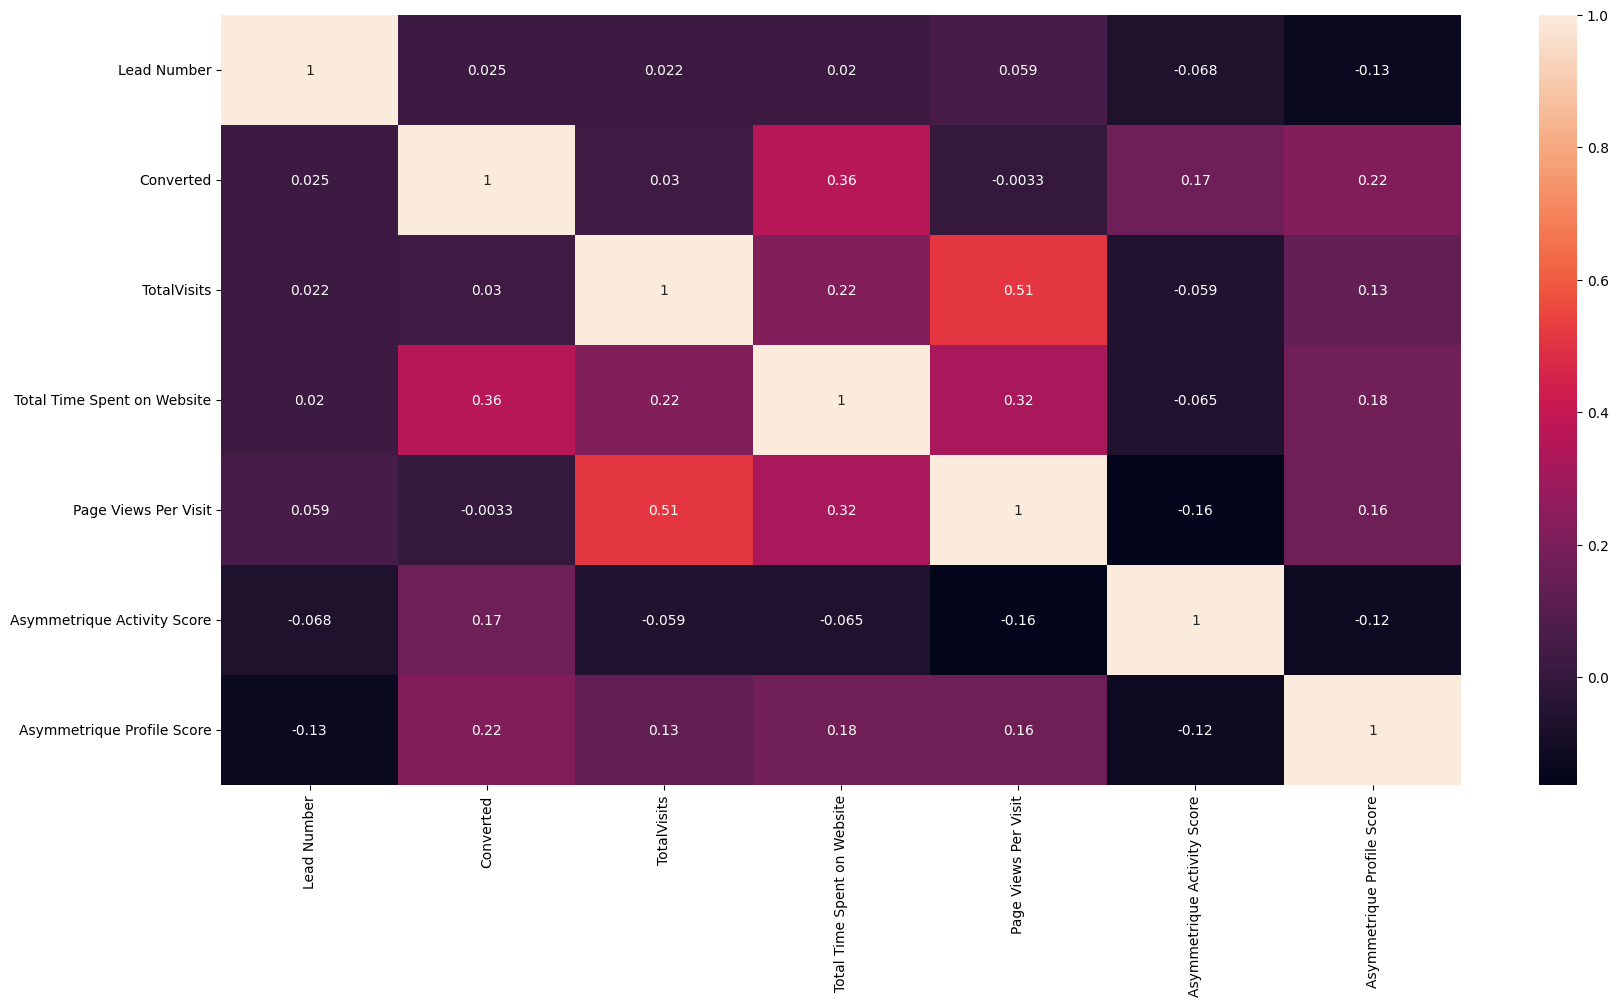

In [7]:
# Vemos la correlación 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [297]:
# Veo los tipos de datos
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
# Pillo la variable objetivo
y = df['Converted']

In [9]:
df = df.drop(['Converted'], axis=1)

In [10]:
# Junto los datasets
df = pd.concat([df, y], axis=1)

In [11]:
# Veo si hay valores nulos
df.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper Article                                False
X Educatio

In [12]:
# Veo los valores respecto a los no converted
df[df['Converted']==0].count()

Prospect ID                                      5679
Lead Number                                      5679
Lead Origin                                      5679
Lead Source                                      5672
Do Not Email                                     5679
Do Not Call                                      5679
TotalVisits                                      5642
Total Time Spent on Website                      5679
Page Views Per Visit                             5642
Last Activity                                    5657
Country                                          4294
Specialization                                   4392
How did you hear about X Education               3755
What is your current occupation                  3359
What matters most to you in choosing a course    3340
Search                                           5679
Magazine                                         5679
Newspaper Article                                5679
X Education Forums          

In [13]:
# Veo los valores respecto a los converted
df[df['Converted']==1].count()

Prospect ID                                      3561
Lead Number                                      3561
Lead Origin                                      3561
Lead Source                                      3532
Do Not Email                                     3561
Do Not Call                                      3561
TotalVisits                                      3461
Total Time Spent on Website                      3561
Page Views Per Visit                             3461
Last Activity                                    3480
Country                                          2485
Specialization                                   3410
How did you hear about X Education               3278
What is your current occupation                  3191
What matters most to you in choosing a course    3191
Search                                           3561
Magazine                                         3561
Newspaper Article                                3561
X Education Forums          

In [14]:
# Visualizo el dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1


In [15]:
# Veo los tipos de datos
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [16]:
# Decido quitar las siguientes columnas
df = df.drop(['Prospect ID','Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Lead Profile', 'City','Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [17]:
# Vemos el porcentaje de valores nulos
total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

,Total,Porcentaje
Lead Quality,4767,0.515909
Asymmetrique Activity Index,4218,0.456494
Asymmetrique Profile Index,4218,0.456494
Asymmetrique Activity Score,4218,0.456494
Asymmetrique Profile Score,4218,0.456494
Tags,3353,0.362879
What matters most to you in choosing a course,2709,0.293182
What is your current occupation,2690,0.291126
Country,2461,0.266342
How did you hear about X Education,2207,0.238853


In [18]:
# Guardo las columnas con más del 40% de valores nulos y las visualizo
columnas_con_perdidas = [col for col in df.columns if df[col].isnull().sum() > 0.4*df.shape[0]]
df[columnas_con_perdidas].head()

,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,Low in Relevance,02.Medium,02.Medium,15.0,15.0
1,NaN,02.Medium,02.Medium,15.0,15.0
2,Might be,02.Medium,01.High,14.0,20.0
3,Not Sure,02.Medium,01.High,13.0,17.0
4,Might be,02.Medium,01.High,15.0,18.0


In [19]:
# Decido borrarlas
df = df.drop(columnas_con_perdidas, axis=1)

In [20]:
# Vemos el porcentaje de valores nulos
total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

,Total,Porcentaje
Tags,3353,0.362879
What matters most to you in choosing a course,2709,0.293182
What is your current occupation,2690,0.291126
Country,2461,0.266342
How did you hear about X Education,2207,0.238853
Specialization,1438,0.155628
TotalVisits,137,0.014827
Page Views Per Visit,137,0.014827
Last Activity,103,0.011147
Lead Source,36,0.003896


In [21]:
# Veo los valores nulos de Tags
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [22]:
# Veo los valores nulos de Tags
df['Tags'].value_counts(dropna=False, normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [23]:
# Veo los valores nulos de What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Los relleno con Unknown
df['Tags'] = df['Tags'].fillna('Unknown')

In [25]:
# Veo los valores nulos de What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [26]:
# Los borro
df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [27]:
# Veo los valores nulos de What What is your current occupation
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Veo los valores nulos de What is your current occupation
df['What is your current occupation'].value_counts(dropna=False, normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [29]:
# Decido usarlos a Unemployed
df['What is your current occupation'].fillna('Unemployed')

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238    Unemployed
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

In [30]:
# Veo los valores nulos de Country
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [31]:
# Veo los valores nulos de Country en porcentaje
df['Country'].value_counts(dropna=False, normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [32]:
# Los borro
df = df.drop(['Country'], axis=1)

In [33]:
# Veo los valores nulos de How did you hear about X Education
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [34]:
# Veo los valores nulos de How did you hear about X Education en porcentaje
df['How did you hear about X Education'].value_counts(dropna=False, normalize=True)

Select                   0.545779
NaN                      0.238853
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

In [35]:
# Los borro
df = df.drop(['How did you hear about X Education'], axis=1)

In [36]:
# Vemos los valores de Specialization
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
# Vemos los valores de Specialization en porcentaje
df['Specialization'].value_counts(dropna=False, normalize=True)

Select                               0.210173
NaN                                  0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [38]:
# Reemplazo select por Other
df['Specialization'] = df['Specialization'].replace({'Select', 'Other'})

In [39]:
df['Specialization'].fillna('Others', inplace=True)

In [40]:
df['What is your current occupation'].value_counts(dropna=False, normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [41]:
# Lo relleno con Unemployed
df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [42]:
# Vemos el porcentaje de valores nulos
total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

,Total,Porcentaje
TotalVisits,137,0.014827
Page Views Per Visit,137,0.014827
Last Activity,103,0.011147
Lead Source,36,0.003896
Lead Origin,0,0.000000
X Education Forums,0,0.000000
Last Notable Activity,0,0.000000
A free copy of Mastering The Interview,0,0.000000
Tags,0,0.000000
Through Recommendations,0,0.000000


In [43]:
# Al ser un porcentaje tan bajo, los borro
df = df.dropna()

In [44]:
# Vemos los tipos de datos
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Search                                     object
Newspaper Article                          object
X Education Forums                         object
Newspaper                                  object
Digital Advertisement                      object
Through Recommendations                    object
Tags                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
Converted                                   int64


In [45]:
# Vemos el porcentaje de valores nulos
total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

,Total,Porcentaje
Lead Origin,0,0.0
Lead Source,0,0.0
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Tags,0,0.0
Through Recommendations,0,0.0
Digital Advertisement,0,0.0
Newspaper,0,0.0
X Education Forums,0,0.0
Newspaper Article,0,0.0


In [46]:
# Vemos los tipos de datos
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Search                                     object
Newspaper Article                          object
X Education Forums                         object
Newspaper                                  object
Digital Advertisement                      object
Through Recommendations                    object
Tags                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
Converted                                   int64


In [47]:
# Vemos las columnas categoricas
df.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Vemos las columnas numericas
df.select_dtypes(include=['int64', 'float64']).columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Converted'],
      dtype='object')

/tmp/ipykernel_32790/3594001649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


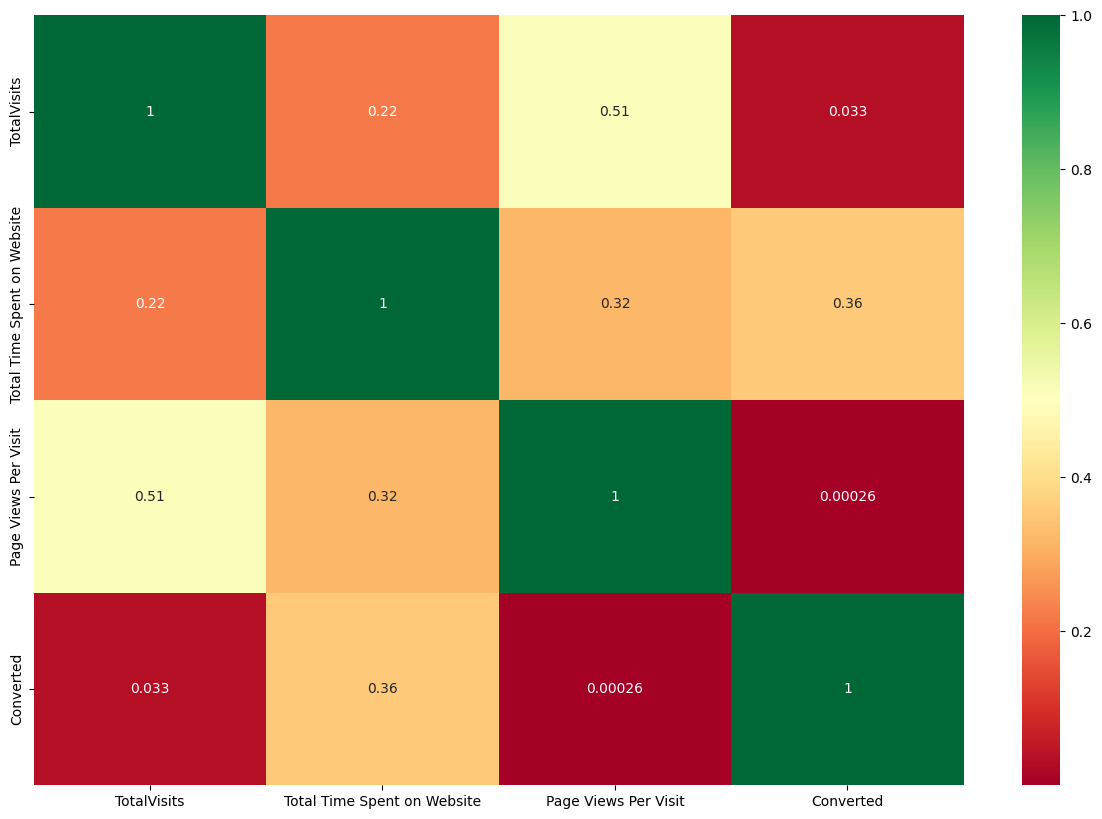

In [49]:
# Visualizo un mapa de calor 
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

# One HOT Encoding

In [50]:
import numpy as np
columnas_categoricas = [columna for columna in df.select_dtypes(exclude = np.number).columns]
columnas_categoricas

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [51]:
x = df[columnas_categoricas].nunique()
columnas_categoricas_binarias = list(x[x == 2].index)
columnas_categoricas_binarias

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [52]:
# Binarias
for nombre in columnas_categoricas_binarias:
    df[nombre] = df[nombre].replace({'No': 0, 'Yes': 1})
    df[nombre] = df[nombre].astype('int64')

In [53]:
# No binarias
columnas_categoricas = [columna for columna in df.select_dtypes(exclude = np.number).columns]
columnas_categoricas

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Last Notable Activity']

In [54]:
df[columnas_categoricas].nunique().sort_values()

Lead Origin                         4
What is your current occupation     6
Last Notable Activity              16
Last Activity                      17
Specialization                     20
Lead Source                        21
Tags                               27
dtype: int64

In [55]:
copia_df = df.copy()

In [56]:
# Veo los tipos de datos
copia_df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Do Not Call                                 int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Search                                      int64
Newspaper Article                           int64
X Education Forums                          int64
Newspaper                                   int64
Digital Advertisement                       int64
Through Recommendations                     int64
Tags                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
Converted                                   int64


In [57]:
copia_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified,0
4,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified,1


In [58]:
# Vemos porcentaje de valores nulos en Lead Origin
copia_df['Lead Origin'].value_counts(dropna=False, normalize=True)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

In [59]:
# One Hot Encoding
ls = pd.get_dummies(copia_df['Lead Origin'], prefix='Lead Origin')
ls = ls.drop(['Lead Origin_Lead Import'], axis=1)
copia_df = pd.concat([copia_df, ls], axis=1)
copia_df = copia_df.drop(['Lead Origin'], axis=1)

In [60]:
what_is_your_current_occupation = pd.get_dummies(copia_df['What is your current occupation'], prefix='What is your current occupation')
what_is_your_current_occupation = what_is_your_current_occupation.drop(['What is your current occupation_Other'], axis=1)
copia_df = pd.concat([copia_df, what_is_your_current_occupation], axis=1)
copia_df = copia_df.drop(['What is your current occupation'], axis=1)

In [61]:
# Decido quitar Lead Source
copia_df = copia_df.drop(['Lead Source'], axis=1)

In [62]:
# Decido quitar Last Activity
copia_df = copia_df.drop(['Last Activity'], axis=1)

In [64]:
# Decido quitar Specialization
copia_df = copia_df.drop(['Specialization'], axis=1)

In [65]:
# Decido quitar Last Notable Activity
copia_df = copia_df.drop(['Last Notable Activity'], axis=1)

In [66]:
# Decido quitar Tags
copia_df = copia_df.drop(['Tags'], axis=1)

In [67]:
copia_df.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,A free copy of Mastering The Interview,Converted,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,0.000441,...,0.318272,0.378554,0.394313,0.538351,0.064029,0.000882,0.000992,0.022702,0.899162,0.074609
std,0.269608,0.014845,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,0.020992,...,0.465831,0.485053,0.488730,0.498554,0.244818,0.029681,0.031480,0.148961,0.301130,0.262774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# Vemos los tipos de datos
copia_df.dtypes

Do Not Email                                              int64
Do Not Call                                               int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Search                                                    int64
Newspaper Article                                         int64
X Education Forums                                        int64
Newspaper                                                 int64
Digital Advertisement                                     int64
Through Recommendations                                   int64
A free copy of Mastering The Interview                    int64
Converted                                                 int64
Lead Origin_API                                           uint8
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form               

# División de datos

In [69]:
X = copia_df.drop(['Converted'], axis=1)
copia_df['Converted'] = pd.Categorical(copia_df['Converted'])
y = copia_df['Converted']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [110]:
# Vemos los tipos de datos
X_train.dtypes

Do Not Email                                              int64
Do Not Call                                               int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Search                                                    int64
Newspaper Article                                         int64
X Education Forums                                        int64
Newspaper                                                 int64
Digital Advertisement                                     int64
Through Recommendations                                   int64
A free copy of Mastering The Interview                    int64
Lead Origin_API                                           uint8
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
What is your current occupation_Business

# Modelos

# Regresión Lineal

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
resultado_regresion_lineal = model.score(X_train, y_train)
resultado_regresion_lineal = resultado_regresion_lineal.round(2)
resultado_regresion_lineal

0.33

# Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [77]:
clf.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred = clf.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
resultado_naive_bayes = accuracy_score(y_test, y_pred)
resultado_naive_bayes = resultado_naive_bayes.round(2)
resultado_naive_bayes

0.79

# KNN

In [80]:
from sklearn import neighbors
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=0) 
import matplotlib.pyplot as plt

Max value uniform: 0.7818710742906649 (29)
Max value distance: 0.7752917208143817 (28)


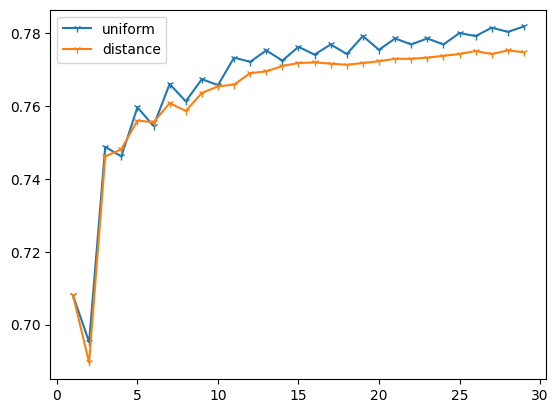

In [82]:
from numpy.ma.core import argmax
import numpy as np


for weights in ['uniform', 'distance']:
    total_scores = []
    for n_neighbors in range(1,30):
      fold_accuracy = []
      knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
      for train, test in cv.split(X_train, y_train):
        knn.fit(X_train.iloc[train], y_train.iloc[train])
        y_pred = knn.predict(X_train.iloc[test])
        acc = accuracy_score(y_train.iloc[test], y_pred)
        fold_accuracy.append(acc)
      total_scores.append(np.mean(fold_accuracy))

    plt.plot(range(1, len(total_scores)+1), total_scores, marker='1', label=weights)
    print(f'Max value {weights}: {max(total_scores)} ({np.argmax(total_scores)+1})')

plt.legend()
plt.show()


In [97]:
k = 29
weights = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights = weights)

#Entrenamiento 
knn.fit(X_train, y_train)


#Evaluacion
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
resultado_knn = acc.round(2)
resultado_knn

0.78

# Ramdom Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [88]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2053
           1       0.60      0.70      0.65       942

    accuracy                           0.76      2995
   macro avg       0.73      0.74      0.73      2995
weighted avg       0.77      0.76      0.76      2995

El accuracy es: 0.7592654424040067


In [89]:
# Resultado de la predicción
resultado_random_forest = metrics.accuracy_score(ypred, y_test)
resultado_random_forest = resultado_random_forest.round(2)
resultado_random_forest

0.76

# Regresión Logística

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [91]:
model.fit(X_train, y_train)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/Cliente Real (copia)/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
y_pred = model.predict(X_test)


In [93]:
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy.round(2)
print("Precisión:", accuracy)


Precisión: 0.79


# Arbol de decisión

In [103]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy.round(2)
print("Precisión:", accuracy)



Precisión: 0.81


# Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
resultado_gradient_boosting = mse.round(2)
print("Mean Squared Error: ", resultado_gradient_boosting)

Mean Squared Error:  0.14


# Resultados de los modelos

In [108]:
# Resultados de todos los modelos
print(f"Precisión de Regresión Lineal: {resultado_regresion_lineal}")
print("Precisión de Naive Bayes:", resultado_naive_bayes)
print("Precisión de KNN:", resultado_knn)
print("Precisión de Random Forest:", resultado_random_forest)
print("Precisión de Regresión Logística:", accuracy)
print("Precisión de Árbol de Decisión:", accuracy)
print("Precisión de Gradient Boosting:", resultado_gradient_boosting)

Precisión de Regresión Lineal: 0.33
Precisión de Naive Bayes: 0.79
Precisión de KNN: 0.78
Precisión de Random Forest: 0.76
Precisión de Regresión Logística: 0.81
Precisión de Árbol de Decisión: 0.81
Precisión de Gradient Boosting: 0.14


# Selección de modelo

In [109]:
# El modelo que mejor resultado ha dado es el de arbol de decisión
import pickle

# Guardar modelo en un archivo
with open('arbol_decision.pkl', 'wb') as f:
    pickle.dump(clf, f)


# Petición de datos

Ahora que ya tenemos nuestro modelo entrenado, podemos hacer predicciones con los datos que nos envíen. Abrimos un terminal y ejecutamos los siguientes comando:
Datos de prueba para un cliente real

## Datos de prueba para alguien que se convertirá en cliente

In [116]:
!curl -X POST -H "Content-Type: application/json" -d '{"Do Not Email": 0,"Do Not Call": 0,"TotalVisits": 5,"Total Time Spent on Website": 1200,"Page Views Per Visit": 3,"Search": 0,"Newspaper Article": 0,"X Education Forums": 0,"Newspaper": 0,"Digital Advertisement": 0,"Through Recommendations": 0,"A free copy of Mastering The Interview": 1,"Lead Origin_API": 1,"Lead Origin_Landing Page Submission": 0,"Lead Origin_Lead Add Form": 0,"What is your current occupation_Businessman": 0,"What is your current occupation_Housewife": 0,"What is your current occupation_Student": 0,"What is your current occupation_Unemployed": 1,"What is your current occupation_Working Professional": 0}' http://localhost:5000/predict

{
  "prediction": "Se convertira en cliente real"
}


## Datos de prueba para alguien que no se convertirá en cliente

In [117]:
!curl -X POST -H "Content-Type: application/json" -d '{"Do Not Email": 0, "Do Not Call": 0, "TotalVisits": 5, "Total Time Spent on Website": 0,"Page Views Per Visit": 3,"Search": 0,"Newspaper Article": 0,"X Education Forums": 0,"Newspaper": 0,"Digital Advertisement": 0,"Through Recommendations": 0,"A free copy of Mastering The Interview": 1,"Lead Origin_API": 0,"Lead Origin_Landing Page Submission": 0,"Lead Origin_Lead Add Form": 0,"What is your current occupation_Businessman": 0,"What is your current occupation_Housewife": 0,"What is your current occupation_Student": 1,"What is your current occupation_Unemployed": 0,"What is your current occupation_Working Professional": 0}' http://localhost:5000/predict

{
  "prediction": "No se convertira en cliente real"
}
